# (3) Creating a Model

The open source packages tensorflow and keras do most of the heavy lifting when it comes to machine learning computation. No need to worry about calculus and backpropogation, just build the model and use .fit(). Learn more about the types of models and a little bit about the math behind the keras and tensorflow functions from [UW CSE 416 Spring 2019](https://courses.cs.washington.edu/courses/cse416/19sp/lectures.html) or similiar in content but with complete access [Andrew Ng's Machine Learning Coursera](https://www.coursera.org/learn/machine-learning?utm_source=gg&utm_medium=sem&utm_content=07-StanfordML-US&campaignid=685340575&adgroupid=52515609594&device=c&keyword=machine%20learning%20mooc&matchtype=b&network=g&devicemodel=&adpostion=&creativeid=273169971757&hide_mobile_promo&gclid=Cj0KCQjwuJz3BRDTARIsAMg-HxX7mT2U1X1Abs98BkFp_IKCypGKMbWTjIiwx4GY-C-3LrQ5R82TtrkaAqn4EALw_wcB).

Now, for building the two-layer model.

In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
from keras.layers import Input, Dense
from keras.models import Model

The input of the two-layer network includes 10 features,

In [3]:
Inputs = Input(shape=(10,))

Arbitrarily we choose 32 as the number of neurons in our one hidden layer. This is a hyperparameter that is best optimized through experimentation, and largely dependent on the data set / function the neural network is approximating. [Source](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/).

When you know the function you are trying to approximate has certain characteristics, you can choose an activation function which will approximate the function faster leading to faster training process. ReLu is a good general approximator and Sigmoid is good for classifiers. [Source](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)

Kernel initialization is an important part of building deep neural networks. Proper initialization will help to extract better features and also to converge faster. So, we have to carefully select our filter initializers, but selecting the kernel initializers is also a kind of hyperparameter tuning (We can't tell exactly which kernel initializers to choose). It all depends on the nature of the dataset and the kind of operation you are going to perform on it. [Source](https://blog.goodaudience.com/visualizing-various-filter-initializers-in-keras-ca14c996db22).

For our hidden layer we will use ReLu activation, which is often a good place to start. The output layer will have sigmoid activation, which approximates the ideal classifier function. The initializer is the LeCun uniform initializer. It draws samples from a uniform distribution within [-limit, limit] where the limit is sqrt(3 / N) where N is the number of input units in the weight tensor. 

In [4]:
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(Inputs)

The output layer of our two-layer network is a single label, so there is 1 node.

In [5]:
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)

Read the [Keras](https://keras.io/api/layers/core_layers/dense/) and [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/lecun_uniform) documentation to understand the syntax better. Tensorflow 2 does the building of a computational graph and execution all in the backend; all thats left is the creation of these connected layers and putting them together in a Model object.

The model with one input layer, one hidden layer and one output layer is called a 'two-layer' model because the inputs are not considered an 'active' layer. the four-layer model similiarly has three hidden layers and one output layer.

In [6]:
model = Model(inputs=Inputs, outputs=predictions)

The two-layer model is complete! Below you can see its structure printed and visualized.

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
fc1_relu (Dense)             (None, 32)                352       
_________________________________________________________________
output_sigmoid (Dense)       (None, 1)                 33        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


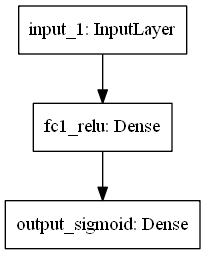

In [8]:
keras.utils.plot_model(model)

Now all thats left is to use the model.fit() method to train it, validate the training, and evaluate its performance.

##### Exercise

Create the four-layer model. Use 64, 32, and 32 nodes for the first, second, and third hidden layers respectively. For all the hidden layers, use the ReLu activation function and LeCun uniform kernel initializer. Print the summary and the visualization. (Hint: What's different about the output layer?)

In [9]:
Inputs_exercise = Input(shape=(16,))

In [10]:
a = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(Inputs_exercise)
b = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc2_relu')(a)
c = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc3_relu')(b)

In [11]:
predictions_exercise = Dense(5, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(c)

In [12]:
model_exercise = Model(inputs=Inputs_exercise, outputs=predictions_exercise)

In [13]:
model_exercise.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
fc1_relu (Dense)             (None, 64)                1088      
_________________________________________________________________
fc2_relu (Dense)             (None, 32)                2080      
_________________________________________________________________
fc3_relu (Dense)             (None, 32)                1056      
_________________________________________________________________
output_sigmoid (Dense)       (None, 5)                 165       
Total params: 4,389
Trainable params: 4,389
Non-trainable params: 0
_________________________________________________________________


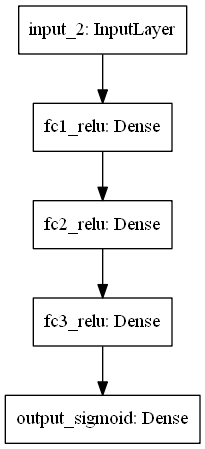

In [14]:
keras.utils.plot_model(model_exercise)